#  loading packages

In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow

In [2]:
import sys
sys.executable

'C:\\Users\\GANIL\\.conda\\envs\\FP\\python.exe'

# Load and preprocess the image dataset.

In [3]:
train_path = './data/train/'
test_path = './data/test/'

In [4]:
train = pd.read_csv('./data/train.csv')
test  = pd.read_csv('./data/test.csv')

In [5]:
imgs_malignant = train[train.benign_malignant == "malignant"].sample(10).image_name.values
imgs_benign    = train[train.benign_malignant == "benign"].sample(10).image_name.values

In [6]:
def print_images(imgs):
    for i, img in enumerate(imgs):
        plt.subplot(2,5,i+1); plt.axis('off')
        plt.imshow(imread(train_path+imgs[i]+".jpg"))       

## Malignant images

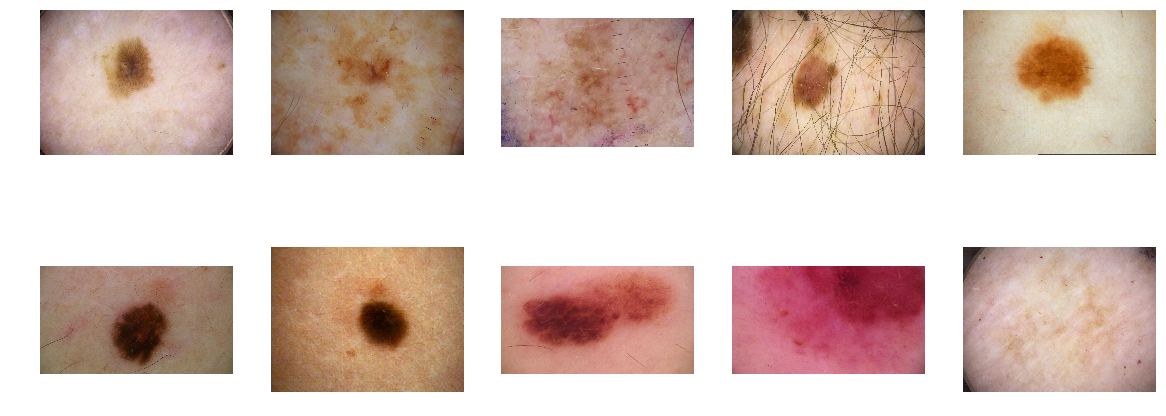

In [7]:
plt.figure(figsize=(20,8))
print_images(imgs_malignant)

## Benign images

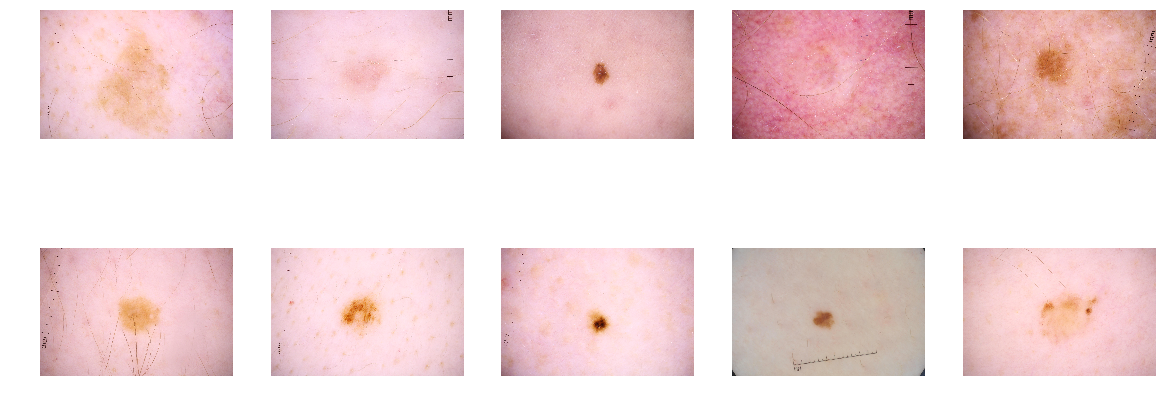

In [8]:
plt.figure(figsize=(20,8))
print_images(imgs_benign)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5140 entries, 0 to 5139
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     5140 non-null   object 
 1   patient_id                     5140 non-null   object 
 2   sex                            5127 non-null   object 
 3   age_approx                     5124 non-null   float64
 4   anatom_site_general_challenge  5054 non-null   object 
 5   diagnosis                      5140 non-null   object 
 6   benign_malignant               5140 non-null   object 
 7   target                         5140 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 321.4+ KB


In [10]:
print("No of malignant images in training data are:",len(train[train.benign_malignant=="malignant"]))
print("No of benign images in training data are:",len(train[train.benign_malignant=="benign"]))

No of malignant images in training data are: 468
No of benign images in training data are: 4672


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     1284 non-null   object 
 1   patient_id                     1284 non-null   object 
 2   sex                            1283 non-null   object 
 3   age_approx                     1283 non-null   float64
 4   anatom_site_general_challenge  1261 non-null   object 
 5   diagnosis                      1284 non-null   object 
 6   benign_malignant               1284 non-null   object 
 7   target                         1284 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 80.4+ KB


In [12]:
print("No of malignant images in test data are:",len(test[test.benign_malignant=="malignant"]))
print("No of benign images in test data are:",len(test[test.benign_malignant=="benign"]))

No of malignant images in test data are: 116
No of benign images in test data are: 1168


In [13]:
train_image_data = []
train_label_data = []
for ind in train.index:
    #imread(train_path+imgs[i]+".jpg")
    img_array = cv2.imread(train_path + train["image_name"][ind] +".jpg",cv2.IMREAD_COLOR)
    # Re-sizing the image to 256,256 pixels with help of the cv2 library function.
    img_array = cv2.resize(img_array,(128,128))
    # Attaching a label to the image and appending it to the list.
    train_image_data.append(img_array)
    train_label_data.append(train["target"][ind])

In [14]:
test_image_data = []
test_label_data = []
for ind in test.index:
    #imread(train_path+imgs[i]+".jpg")
    img_array = cv2.imread(test_path + test["image_name"][ind] +".jpg",cv2.IMREAD_COLOR)
    # Re-sizing the image to 256,256 pixels with help of the cv2 library function.
    img_array = cv2.resize(img_array,(128,128))
    # Attaching a label to the image and appending it to the list.
    test_image_data.append(img_array)
    test_label_data.append(test["target"][ind])

# Preparing the data.

In [15]:
# Converting to np array.
train_images = np.array(train_image_data)
test_images  = np.array(test_image_data)
# Converting to np array.
train_labels = np.array(train_label_data)
test_labels  = np.array(test_label_data)

In [16]:
# Formatting train and test images as float 32 tensors.
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
#train_images = train_images.astype('float32') / 255

# Data Augmentation to prevent Overfitting

In [17]:
# Code adapted from book Deep learning by Francois Chollet.
# Importing ImageDatagenerator.
from keras.preprocessing.image import ImageDataGenerator
# Configuratin of image data generator.
train_datagen = ImageDataGenerator(
        # randomly rotate images in the range.
        rotation_range=40,
        # Randomly zoom image 
        zoom_range = 0.2, 
        # randomly shift images horizontally
        width_shift_range=0.2, 
        # randomly shift images vertically
        height_shift_range=0.2, 
        # randomly flips images horizontally.
        horizontal_flip=True,
        # randomly applying shearing transformations.
        shear_range=0.2,
        # filling in newly created pixels
        fill_mode='nearest'
        ) 

Using TensorFlow backend.


# Evaluation protocol.

In [18]:
# Validation varialbe to hold-out 15 % train data.
val=int(len(train_images)*0.15)
# Validation data.
images_val = train_images[:val]
# Partial train data after taking out validation data.
partial_images_train = train_images[val:]
# Validation labels.
labels_val = train_labels[:val]
# Partial labels after taking out validation labels.
partial_labels_train = train_labels[val:]

In [19]:
# Checking shape of validation data.
print("Shape of validation image data: ",  images_val.shape)
# Checking shape of partial train image data.
print("Shape of partial train image data: ",partial_images_train.shape)
# Checking sahpe of validation labels.
print("Shape of validation labels: ",labels_val.shape)
# Checking shape of partial train label data.
print("Shape of partial train label data: ",partial_labels_train.shape)

Shape of validation image data:  (771, 128, 128, 3)
Shape of partial train image data:  (4369, 128, 128, 3)
Shape of validation labels:  (771,)
Shape of partial train label data:  (4369,)


In [20]:
#Function definiton to plot train loss vs validation loss and training accuracy vs validation accuracy.
def plot_loss_auc(History):
    # fig size definition.
    fig, axs = plt.subplots(1, 2, figsize = (16, 5))
    # axis[0] plotting
    axs[0].plot(History.history['loss'])
    axs[0].plot(History.history['val_loss'])
    # axis[0] title.
    axs[0].set_title('Training and validation Loss')
    # axis[0] y label
    axs[0].set_ylabel('Loss')
    # axis[0] x label
    axs[0].set_xlabel('Epochs')
    # axis[0] legend.
    axs[0].legend(['Train loss', 'Validation loss'])

    # axis[1] plotting
    axs[1].plot(History.history['auc'])
    axs[1].plot(History.history['val_auc'])
    # axis[1] title.
    axs[1].set_title('Training and Validation AUC')
    # axis[1] y label
    axs[1].set_ylabel('AUC')
     # axis[1] x label
    axs[1].set_xlabel('Epochs')
     # axis[1] legend.
    axs[1].legend(['Train AUC', 'Validation AUC'])

In [21]:
def k_fold_validation(k, mod, num_of_epochs, batch):
    num_val_samples = len(train_images) // k
    hist = []
    for i in range(k):
        print('processing fold #', i)
        images_val = train_images[i * num_val_samples: (i + 1) * num_val_samples]
        labels_val = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
        partial_images_train = np.concatenate(
        [train_images[:i * num_val_samples],
        train_images[(i + 1) * num_val_samples:]],
        axis=0)
        partial_labels_train = np.concatenate(
        [train_labels[:i * num_val_samples],
        train_labels[(i + 1) * num_val_samples:]],
        axis=0)
        model = mod
        History_k = model.fit(train_datagen.flow(partial_images_train,partial_labels_train, batch_size= batch),
                                  epochs = num_of_epochs, validation_data = (images_val, labels_val))
        hist.append(History_k.history)
    return hist

In [22]:
#Function definiton to plot train loss vs validation loss and training accuracy vs validation accuracy.
def plot_loss_auc_kval(history_data):
    loss = []
    auc  = []
    val_loss = []
    val_auc  = []
    for history in history_data:
        loss.append(history["loss"])
        auc.append(history["auc"])
        val_loss.append(history["val_loss"])
        val_auc.append(history["val_auc"])
    loss_df = pd.DataFrame(loss)
    auc_df= pd.DataFrame(auc)
    val_loss_df =pd.DataFrame(val_loss)
    val_auc_df =pd.DataFrame(val_auc)
    # fig size definition.
    fig, axs = plt.subplots(1, 2, figsize = (16, 5))
    # axis[0] plotting
    axs[0].plot(loss_df.mean())
    axs[0].plot(val_loss_df.mean())
    # axis[0] title.
    axs[0].set_title('Training and validation Loss')
    # axis[0] y label
    axs[0].set_ylabel('Loss')
    # axis[0] x label
    axs[0].set_xlabel('Epochs')
    # axis[0] legend.
    axs[0].legend(['Train loss', 'Validation loss'])

    # axis[1] plotting
    axs[1].plot(auc_df.mean())
    axs[1].plot(val_auc_df.mean())
    # axis[1] title.
    axs[1].set_title('Training and Validation AUC')
    # axis[1] y label
    axs[1].set_ylabel('AUC')
     # axis[1] x label
    axs[1].set_xlabel('Epochs')
     # axis[1] legend.
    axs[1].legend(['Train AUC', 'Validation AUC'])

# Developing a baseline model.

In [23]:
# Applying data Augmentation on partial train images.
train_datagen.fit(partial_images_train)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [25]:
def base_model():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(128, 128, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=[tensorflow.keras.metrics.AUC(name="auc")])
    return model

In [26]:
model = base_model()

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 127008)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                8128576   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 8,129,537
Trainable params: 8,129,537
Non-trainable params: 0
_________________________________________________________________


# Validating  using hold out validation

In [28]:
History_base = model.fit(train_datagen.flow(partial_images_train,partial_labels_train, batch_size=64),
                              epochs = 10, validation_data = (images_val,labels_val))

Epoch 1/10
69/69 [==============================] - 15s 212ms/step - loss: 0.5038 - auc: 0.5969 - val_loss: 0.2966 - val_auc: 0.7327
Epoch 2/10
69/69 [==============================] - 14s 202ms/step - loss: 0.3116 - auc: 0.6244 - val_loss: 0.2998 - val_auc: 0.7590
Epoch 3/10
69/69 [==============================] - 14s 203ms/step - loss: 0.2940 - auc: 0.6711 - val_loss: 0.2735 - val_auc: 0.8006
Epoch 4/10
69/69 [==============================] - 14s 204ms/step - loss: 0.2962 - auc: 0.6584 - val_loss: 0.2770 - val_auc: 0.8070
Epoch 5/10
69/69 [==============================] - 14s 206ms/step - loss: 0.2901 - auc: 0.6789 - val_loss: 0.2949 - val_auc: 0.7730
Epoch 6/10
69/69 [==============================] - 14s 208ms/step - loss: 0.2885 - auc: 0.6840 - val_loss: 0.3261 - val_auc: 0.7941
Epoch 7/10
69/69 [==============================] - 14s 210ms/step - loss: 0.2868 - auc: 0.6972 - val_loss: 0.2786 - val_auc: 0.8199
Epoch 8/10
69/69 [==============================] - 14s 207ms/step - 

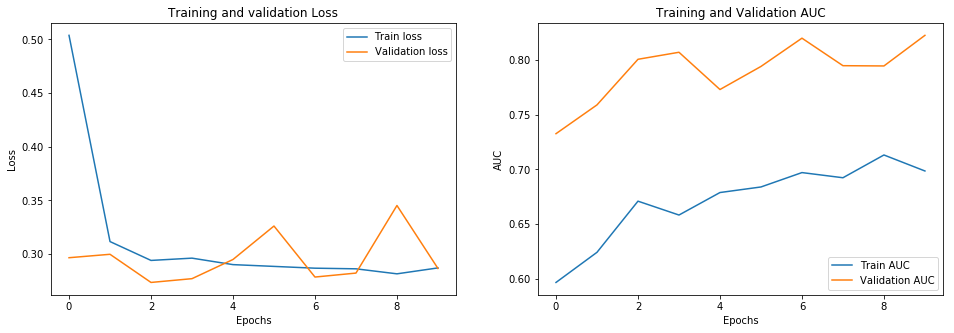

In [29]:
plot_loss_auc(History_base)

### Achieving random baseline.
As we are able to achieve an accuracy of around 0.6 with the baseline model we are able to beat a random baseline of 0.2.

 # Scaling up the model.

In [30]:
def build_model_it2():
    model = Sequential()
    # Basic convnet with Conv layer with input shape (150, 150, 3)
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    # Max pooling layer
    model.add(MaxPooling2D((2, 2)))
    # Conv2D layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    # Max pooling layer
    model.add(MaxPooling2D((2, 2)))
    # Conv2D layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    # Max pooling layer
    model.add(MaxPooling2D((2, 2)))
    # Conv2D layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    # Max pooling layer
    model.add(MaxPooling2D((2, 2)))

    #to flatten higher dimension output to 1D
    model.add(Flatten())
    # Dense layer with 512 units
    model.add(Dense(512, activation='relu'))
    # Dense layer with 64 units
    model.add(Dense(128, activation='relu'))
    # Last layer with softmax activation.
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=[tensorflow.keras.metrics.AUC(name="auc")])
    return model

In [31]:
model_2 = build_model_it2()

In [32]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 128)      

In [33]:
History_model_2 = model_2.fit(train_datagen.flow(partial_images_train, partial_labels_train, batch_size = 64),
                              epochs = 250, validation_data = (images_val,labels_val))

Epoch 1/250
69/69 [==============================] - 15s 213ms/step - loss: 0.3384 - auc: 0.5812 - val_loss: 0.3056 - val_auc: 0.7408
Epoch 2/250
69/69 [==============================] - 15s 211ms/step - loss: 0.3177 - auc: 0.5673 - val_loss: 0.3032 - val_auc: 0.7485
Epoch 3/250
69/69 [==============================] - 15s 212ms/step - loss: 0.3042 - auc: 0.6008 - val_loss: 0.3420 - val_auc: 0.7530
Epoch 4/250
69/69 [==============================] - 15s 212ms/step - loss: 0.3252 - auc: 0.5651 - val_loss: 0.3336 - val_auc: 0.7528
Epoch 5/250
69/69 [==============================] - 15s 220ms/step - loss: 0.3078 - auc: 0.5821 - val_loss: 0.3074 - val_auc: 0.7545
Epoch 6/250
69/69 [==============================] - 15s 215ms/step - loss: 0.3033 - auc: 0.6093 - val_loss: 0.3021 - val_auc: 0.7722
Epoch 7/250
69/69 [==============================] - 16s 235ms/step - loss: 0.2981 - auc: 0.6321 - val_loss: 0.3276 - val_auc: 0.7388
Epoch 8/250
69/69 [==============================] - 15s 213ms

Epoch 62/250
69/69 [==============================] - 15s 219ms/step - loss: 0.2635 - auc: 0.7621 - val_loss: 0.2527 - val_auc: 0.8197
Epoch 63/250
69/69 [==============================] - 15s 217ms/step - loss: 0.2555 - auc: 0.7851 - val_loss: 0.2725 - val_auc: 0.8156
Epoch 64/250
69/69 [==============================] - 15s 220ms/step - loss: 0.2572 - auc: 0.7872 - val_loss: 0.3257 - val_auc: 0.8096
Epoch 65/250
69/69 [==============================] - 15s 220ms/step - loss: 0.2561 - auc: 0.7907 - val_loss: 0.2672 - val_auc: 0.8071
Epoch 66/250
69/69 [==============================] - 15s 219ms/step - loss: 0.2628 - auc: 0.7737 - val_loss: 0.2671 - val_auc: 0.8027
Epoch 67/250
69/69 [==============================] - 15s 217ms/step - loss: 0.2654 - auc: 0.7745 - val_loss: 0.2632 - val_auc: 0.8133
Epoch 68/250
69/69 [==============================] - 15s 222ms/step - loss: 0.2596 - auc: 0.7834 - val_loss: 0.2618 - val_auc: 0.8158
Epoch 69/250
69/69 [==============================] - 1

69/69 [==============================] - 15s 219ms/step - loss: 0.2467 - auc: 0.8124 - val_loss: 0.2847 - val_auc: 0.8160
Epoch 123/250
69/69 [==============================] - 15s 223ms/step - loss: 0.2509 - auc: 0.8108 - val_loss: 0.2675 - val_auc: 0.8169
Epoch 124/250
69/69 [==============================] - 15s 220ms/step - loss: 0.2508 - auc: 0.8061 - val_loss: 0.2748 - val_auc: 0.8176
Epoch 125/250
69/69 [==============================] - 15s 220ms/step - loss: 0.2499 - auc: 0.8030 - val_loss: 0.2816 - val_auc: 0.8420
Epoch 126/250
69/69 [==============================] - 15s 221ms/step - loss: 0.2504 - auc: 0.8119 - val_loss: 0.3590 - val_auc: 0.8088
Epoch 127/250
69/69 [==============================] - 15s 219ms/step - loss: 0.2520 - auc: 0.8126 - val_loss: 45.7643 - val_auc: 0.5666
Epoch 128/250
69/69 [==============================] - 15s 222ms/step - loss: 0.5290 - auc: 0.7913 - val_loss: 0.2637 - val_auc: 0.8313
Epoch 129/250
69/69 [==============================] - 15s 21

69/69 [==============================] - 15s 222ms/step - loss: 0.2483 - auc: 0.8109 - val_loss: 1.4502 - val_auc: 0.6446
Epoch 183/250
69/69 [==============================] - 15s 219ms/step - loss: 0.2519 - auc: 0.8084 - val_loss: 0.2787 - val_auc: 0.8418
Epoch 184/250
69/69 [==============================] - 15s 218ms/step - loss: 0.2406 - auc: 0.8278 - val_loss: 0.2470 - val_auc: 0.8484
Epoch 185/250
69/69 [==============================] - 15s 221ms/step - loss: 0.2437 - auc: 0.8207 - val_loss: 0.2703 - val_auc: 0.8258
Epoch 186/250
69/69 [==============================] - 15s 219ms/step - loss: 0.2509 - auc: 0.8140 - val_loss: 0.3059 - val_auc: 0.7981
Epoch 187/250
69/69 [==============================] - 15s 215ms/step - loss: 0.2402 - auc: 0.8301 - val_loss: 0.7774 - val_auc: 0.7731
Epoch 188/250
69/69 [==============================] - 15s 218ms/step - loss: 0.2428 - auc: 0.8205 - val_loss: 0.2847 - val_auc: 0.8079
Epoch 189/250
69/69 [==============================] - 15s 220

69/69 [==============================] - 15s 216ms/step - loss: 0.2421 - auc: 0.8270 - val_loss: 0.2652 - val_auc: 0.8237
Epoch 243/250
69/69 [==============================] - 15s 219ms/step - loss: 0.2430 - auc: 0.8221 - val_loss: 0.2677 - val_auc: 0.8438
Epoch 244/250
69/69 [==============================] - 15s 217ms/step - loss: 0.2495 - auc: 0.8129 - val_loss: 0.2922 - val_auc: 0.8126
Epoch 245/250
69/69 [==============================] - 15s 218ms/step - loss: 0.2460 - auc: 0.8242 - val_loss: 0.3052 - val_auc: 0.8172
Epoch 246/250
69/69 [==============================] - 15s 218ms/step - loss: 0.2452 - auc: 0.8202 - val_loss: 0.2802 - val_auc: 0.8390
Epoch 247/250
69/69 [==============================] - 15s 217ms/step - loss: 0.2514 - auc: 0.8185 - val_loss: 0.3440 - val_auc: 0.8421
Epoch 248/250
69/69 [==============================] - 15s 216ms/step - loss: 0.3058 - auc: 0.8098 - val_loss: 0.2844 - val_auc: 0.8369
Epoch 249/250
69/69 [==============================] - 15s 220

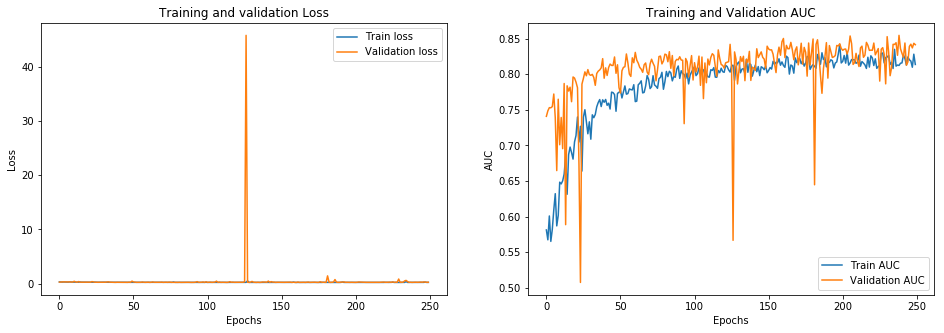

In [34]:
plot_loss_auc(History_model_2)

In [35]:
def build_model_it3():
    model = Sequential()
    # Basic convnet with Conv layer with input shape (150, 150, 3)
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    # Max pooling layer
    model.add(MaxPooling2D((2, 2)))
    # Conv2D layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    # Max pooling layer
    model.add(MaxPooling2D((2, 2)))
    # Conv2D layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    # Max pooling layer
    model.add(MaxPooling2D((2, 2)))
    # Conv2D layer
    #model.add(Conv2D(128, (3, 3), activation='relu'))
    # Max pooling layer
    #model.add(MaxPooling2D((2, 2)))

    #to flatten higher dimension output to 1D
    model.add(Flatten())
    
    model.add(Dropout(0.2))
    # Dense layer with 512 units
    
    model.add(Dense(512, activation='relu'))
    # Dense layer with 64 units
    #model.add(Dense(128, activation='relu'))
    # Last layer with softmax activation.
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=[tensorflow.keras.metrics.AUC(name="auc")])
    return model

In [36]:
model_3 = build_model_it3()

In [37]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)            

In [38]:
History_model_3 = model_3.fit(train_datagen.flow(partial_images_train, partial_labels_train, batch_size = 64),
                              epochs = 150, validation_data = (images_val,labels_val))

Epoch 1/150
69/69 [==============================] - 15s 223ms/step - loss: 0.3152 - auc: 0.6350 - val_loss: 0.2929 - val_auc: 0.7560
Epoch 2/150
69/69 [==============================] - 15s 218ms/step - loss: 0.2860 - auc: 0.6809 - val_loss: 0.3076 - val_auc: 0.7575
Epoch 3/150
69/69 [==============================] - 15s 218ms/step - loss: 0.2853 - auc: 0.6848 - val_loss: 0.2949 - val_auc: 0.7638
Epoch 4/150
69/69 [==============================] - 15s 218ms/step - loss: 0.2867 - auc: 0.6740 - val_loss: 0.2934 - val_auc: 0.7669
Epoch 5/150
69/69 [==============================] - 15s 218ms/step - loss: 0.2942 - auc: 0.6640 - val_loss: 0.3358 - val_auc: 0.7607
Epoch 6/150
69/69 [==============================] - 15s 219ms/step - loss: 0.2846 - auc: 0.6878 - val_loss: 0.2983 - val_auc: 0.7735
Epoch 7/150
69/69 [==============================] - 15s 219ms/step - loss: 0.2802 - auc: 0.7108 - val_loss: 0.2846 - val_auc: 0.7728
Epoch 8/150
69/69 [==============================] - 15s 219ms

Epoch 62/150
69/69 [==============================] - 18s 254ms/step - loss: 0.2448 - auc: 0.8151 - val_loss: 0.2592 - val_auc: 0.8108
Epoch 63/150
69/69 [==============================] - 17s 250ms/step - loss: 0.2440 - auc: 0.8176 - val_loss: 0.2638 - val_auc: 0.7955
Epoch 64/150
69/69 [==============================] - 15s 218ms/step - loss: 0.2410 - auc: 0.8241 - val_loss: 0.2567 - val_auc: 0.8143
Epoch 65/150
69/69 [==============================] - 15s 219ms/step - loss: 0.2420 - auc: 0.8235 - val_loss: 0.2637 - val_auc: 0.8111
Epoch 66/150
69/69 [==============================] - 15s 222ms/step - loss: 0.2402 - auc: 0.8282 - val_loss: 0.2666 - val_auc: 0.7926
Epoch 67/150
69/69 [==============================] - 15s 221ms/step - loss: 0.2448 - auc: 0.8167 - val_loss: 0.2582 - val_auc: 0.8113
Epoch 68/150
69/69 [==============================] - 15s 221ms/step - loss: 0.2392 - auc: 0.8275 - val_loss: 0.2621 - val_auc: 0.7995
Epoch 69/150
69/69 [==============================] - 1

69/69 [==============================] - 15s 219ms/step - loss: 0.2196 - auc: 0.8655 - val_loss: 0.2847 - val_auc: 0.8142
Epoch 123/150
69/69 [==============================] - 15s 218ms/step - loss: 0.2184 - auc: 0.8647 - val_loss: 0.2567 - val_auc: 0.8348
Epoch 124/150
69/69 [==============================] - 15s 221ms/step - loss: 0.2240 - auc: 0.8567 - val_loss: 0.2564 - val_auc: 0.8354
Epoch 125/150
69/69 [==============================] - 15s 219ms/step - loss: 0.2215 - auc: 0.8633 - val_loss: 0.2835 - val_auc: 0.8264
Epoch 126/150
69/69 [==============================] - 15s 219ms/step - loss: 0.2272 - auc: 0.8489 - val_loss: 0.2503 - val_auc: 0.8355
Epoch 127/150
69/69 [==============================] - 15s 220ms/step - loss: 0.2280 - auc: 0.8459 - val_loss: 0.2629 - val_auc: 0.8029
Epoch 128/150
69/69 [==============================] - 15s 220ms/step - loss: 0.2256 - auc: 0.8502 - val_loss: 0.2519 - val_auc: 0.8307
Epoch 129/150
69/69 [==============================] - 15s 218

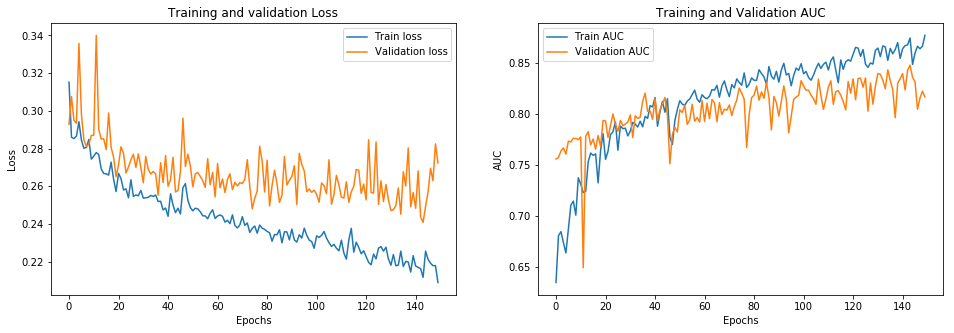

In [39]:
plot_loss_auc(History_model_3)

In [40]:
from tensorflow.keras.applications import VGG16

In [41]:
vgg_b = VGG16(weights='imagenet',include_top=False,input_shape=(128, 128, 3))

In [42]:
vgg_b.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [43]:
def build_model_vgg():
    model = Sequential()
    model.add(vgg_b)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=[tensorflow.keras.metrics.AUC(name="auc")])
    return model

In [44]:
model_4 = build_model_vgg()

In [45]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [46]:
len(model_4.trainable_weights)

30

In [47]:
vgg_b.trainable = False

In [48]:
len(model_4.trainable_weights)

4

In [49]:
History_model_4 = model_4.fit(train_datagen.flow(partial_images_train, partial_labels_train, batch_size = 64),
                              epochs = 150, validation_data = (images_val,labels_val))

Epoch 1/150
69/69 [==============================] - 21s 310ms/step - loss: 0.4617 - auc: 0.4990 - val_loss: 0.3192 - val_auc: 0.5410
Epoch 2/150
69/69 [==============================] - 19s 276ms/step - loss: 0.3084 - auc: 0.4948 - val_loss: 0.3201 - val_auc: 0.5209
Epoch 3/150
69/69 [==============================] - 19s 277ms/step - loss: 0.3044 - auc: 0.5224 - val_loss: 0.3191 - val_auc: 0.6156
Epoch 4/150
69/69 [==============================] - 19s 278ms/step - loss: 0.3124 - auc: 0.4823 - val_loss: 0.3190 - val_auc: 0.5707
Epoch 5/150
69/69 [==============================] - 19s 278ms/step - loss: 0.3155 - auc: 0.4960 - val_loss: 0.3261 - val_auc: 0.3281
Epoch 6/150
69/69 [==============================] - 19s 277ms/step - loss: 0.3073 - auc: 0.5042 - val_loss: 0.3486 - val_auc: 0.2578
Epoch 7/150
69/69 [==============================] - 19s 278ms/step - loss: 0.3068 - auc: 0.4891 - val_loss: 0.3229 - val_auc: 0.6402
Epoch 8/150
69/69 [==============================] - 19s 278ms

Epoch 60/150
69/69 [==============================] - 19s 277ms/step - loss: 0.2451 - auc: 0.8139 - val_loss: 0.2579 - val_auc: 0.8444
Epoch 61/150
69/69 [==============================] - 19s 279ms/step - loss: 0.2435 - auc: 0.8213 - val_loss: 0.2763 - val_auc: 0.8308
Epoch 62/150
69/69 [==============================] - 19s 277ms/step - loss: 0.2443 - auc: 0.8162 - val_loss: 0.2628 - val_auc: 0.8255
Epoch 63/150
69/69 [==============================] - 19s 276ms/step - loss: 0.2517 - auc: 0.8032 - val_loss: 0.2574 - val_auc: 0.8253
Epoch 64/150
69/69 [==============================] - 19s 278ms/step - loss: 0.2435 - auc: 0.8174 - val_loss: 0.2549 - val_auc: 0.8446
Epoch 65/150
69/69 [==============================] - 19s 277ms/step - loss: 0.2408 - auc: 0.8274 - val_loss: 0.2523 - val_auc: 0.8392
Epoch 66/150
69/69 [==============================] - 19s 277ms/step - loss: 0.2445 - auc: 0.8171 - val_loss: 0.2497 - val_auc: 0.8472
Epoch 67/150
69/69 [==============================] - 1

69/69 [==============================] - 20s 293ms/step - loss: 0.2298 - auc: 0.8485 - val_loss: 0.2471 - val_auc: 0.8435
Epoch 121/150
69/69 [==============================] - 22s 319ms/step - loss: 0.2384 - auc: 0.8337 - val_loss: 0.2560 - val_auc: 0.8448
Epoch 122/150
69/69 [==============================] - 21s 299ms/step - loss: 0.2408 - auc: 0.8255 - val_loss: 0.2438 - val_auc: 0.8513
Epoch 123/150
69/69 [==============================] - 21s 300ms/step - loss: 0.2316 - auc: 0.8456 - val_loss: 0.2460 - val_auc: 0.8495
Epoch 124/150
69/69 [==============================] - 20s 296ms/step - loss: 0.2257 - auc: 0.8562 - val_loss: 0.2377 - val_auc: 0.8564
Epoch 125/150
69/69 [==============================] - 20s 291ms/step - loss: 0.2302 - auc: 0.8489 - val_loss: 0.2687 - val_auc: 0.8453
Epoch 126/150
69/69 [==============================] - 20s 295ms/step - loss: 0.2595 - auc: 0.7959 - val_loss: 0.2598 - val_auc: 0.8180
Epoch 127/150
69/69 [==============================] - 22s 314

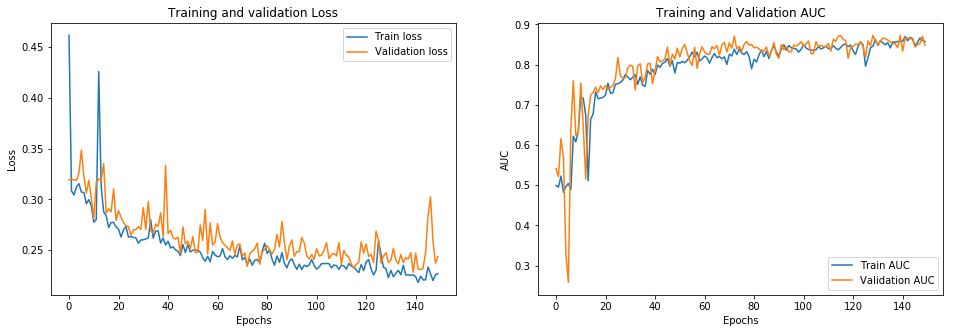

In [50]:
plot_loss_auc(History_model_4)

In [51]:
from tensorflow.keras.applications import ResNet50

In [52]:
ResNet50_b = ResNet50(weights='imagenet',include_top=False,input_shape=(128, 128, 3))

In [53]:
ResNet50_b.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [54]:
def build_model_RN():
    model = Sequential()
    model.add(ResNet50_b)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=[tensorflow.keras.metrics.AUC(name="auc")])
    return model

In [55]:
model_5 = build_model_RN()

In [56]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
flatten_4 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               8388864   
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 31,976,833
Trainable params: 31,923,713
Non-trainable params: 53,120
_________________________________________________________________


In [57]:
len(model_5.trainable_weights)

216

In [58]:
ResNet50_b.trainable = False

In [59]:
len(model_5.trainable_weights)

4

In [60]:
History_model_5 = model_5.fit(train_datagen.flow(partial_images_train, partial_labels_train, batch_size = 64),
                              epochs = 150, validation_data = (images_val,labels_val))

Epoch 1/150
69/69 [==============================] - 22s 320ms/step - loss: 0.7096 - auc: 0.7166 - val_loss: 2804.4558 - val_auc: 0.5000
Epoch 2/150
69/69 [==============================] - 20s 283ms/step - loss: 0.7867 - auc: 0.7184 - val_loss: 48.2477 - val_auc: 0.5000
Epoch 3/150
69/69 [==============================] - 19s 280ms/step - loss: 0.2623 - auc: 0.7718 - val_loss: 0.3523 - val_auc: 0.5686
Epoch 4/150
69/69 [==============================] - 19s 278ms/step - loss: 0.2541 - auc: 0.7885 - val_loss: 0.5358 - val_auc: 0.7019
Epoch 5/150
69/69 [==============================] - 19s 278ms/step - loss: 0.2519 - auc: 0.7956 - val_loss: 0.4623 - val_auc: 0.6924
Epoch 6/150
69/69 [==============================] - 19s 279ms/step - loss: 0.3250 - auc: 0.7478 - val_loss: 0.4138 - val_auc: 0.5047
Epoch 7/150
69/69 [==============================] - 19s 278ms/step - loss: 0.2750 - auc: 0.7746 - val_loss: 0.3422 - val_auc: 0.5558
Epoch 8/150
69/69 [==============================] - 19s 2

Epoch 62/150
69/69 [==============================] - 20s 283ms/step - loss: 0.2540 - auc: 0.8104 - val_loss: 0.2593 - val_auc: 0.8166
Epoch 63/150
69/69 [==============================] - 20s 292ms/step - loss: 0.2475 - auc: 0.8086 - val_loss: 0.2606 - val_auc: 0.8077
Epoch 64/150
69/69 [==============================] - 20s 288ms/step - loss: 0.2466 - auc: 0.8093 - val_loss: 0.2516 - val_auc: 0.8270
Epoch 65/150
69/69 [==============================] - 19s 282ms/step - loss: 0.2452 - auc: 0.8108 - val_loss: 0.2520 - val_auc: 0.8335
Epoch 66/150
69/69 [==============================] - 19s 282ms/step - loss: 0.2388 - auc: 0.8278 - val_loss: 0.2494 - val_auc: 0.8338
Epoch 67/150
69/69 [==============================] - 21s 306ms/step - loss: 0.2374 - auc: 0.8335 - val_loss: 0.2467 - val_auc: 0.8418
Epoch 68/150
69/69 [==============================] - 23s 331ms/step - loss: 0.2426 - auc: 0.8205 - val_loss: 0.2613 - val_auc: 0.8141
Epoch 69/150
69/69 [==============================] - 2

69/69 [==============================] - 19s 278ms/step - loss: 0.2254 - auc: 0.8535 - val_loss: 0.2576 - val_auc: 0.8410
Epoch 123/150
69/69 [==============================] - 19s 273ms/step - loss: 0.2170 - auc: 0.8711 - val_loss: 0.2571 - val_auc: 0.8327
Epoch 124/150
69/69 [==============================] - 19s 275ms/step - loss: 0.2234 - auc: 0.8602 - val_loss: 0.2595 - val_auc: 0.8345
Epoch 125/150
69/69 [==============================] - 19s 275ms/step - loss: 0.2197 - auc: 0.8660 - val_loss: 0.2609 - val_auc: 0.8203
Epoch 126/150
69/69 [==============================] - 19s 274ms/step - loss: 0.2237 - auc: 0.8593 - val_loss: 0.2781 - val_auc: 0.8460
Epoch 127/150
69/69 [==============================] - 19s 275ms/step - loss: 0.2181 - auc: 0.8692 - val_loss: 0.2752 - val_auc: 0.8444
Epoch 128/150
69/69 [==============================] - 19s 274ms/step - loss: 0.2161 - auc: 0.8733 - val_loss: 0.2658 - val_auc: 0.8375
Epoch 129/150
69/69 [==============================] - 20s 289

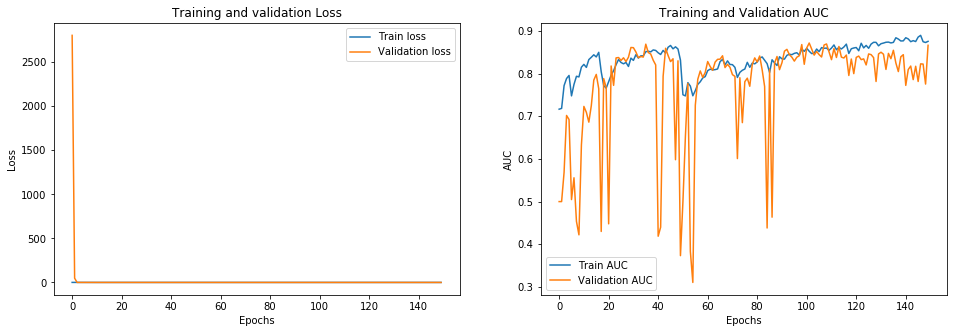

In [61]:
plot_loss_auc(History_model_5)

In [62]:
from tensorflow.keras.applications import InceptionV3

In [63]:
InceptionV3_b = InceptionV3(weights='imagenet',include_top=False,input_shape=(128, 128, 3))

In [64]:
InceptionV3_b.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 63, 63, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 63, 63, 32)   96          conv2d_8[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 63, 63, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [65]:
def build_model_V3():
    model = Sequential()
    model.add(InceptionV3_b)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=[tensorflow.keras.metrics.AUC(name="auc")])
    return model

In [66]:
model_6 = build_model_V3()

In [67]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2, 2, 2048)        21802784  
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 257       
Total params: 23,900,449
Trainable params: 23,866,017
Non-trainable params: 34,432
_________________________________________________________________


In [68]:
len(model_6.trainable_weights)

192

In [69]:
InceptionV3_b.trainable = False

In [70]:
len(model_6.trainable_weights)

4

In [71]:
History_model_6 = model_6.fit(train_datagen.flow(partial_images_train, partial_labels_train, batch_size = 64),
                              epochs = 150, validation_data = (images_val,labels_val))

Epoch 1/150
69/69 [==============================] - 24s 343ms/step - loss: 0.6256 - auc: 0.6382 - val_loss: 314.0729 - val_auc: 0.6731
Epoch 2/150
69/69 [==============================] - 19s 276ms/step - loss: 0.2646 - auc: 0.7615 - val_loss: 6.0146 - val_auc: 0.7762
Epoch 3/150
69/69 [==============================] - 19s 272ms/step - loss: 0.2461 - auc: 0.8129 - val_loss: 1.1699 - val_auc: 0.8271
Epoch 4/150
69/69 [==============================] - 20s 287ms/step - loss: 0.2396 - auc: 0.8280 - val_loss: 0.2393 - val_auc: 0.8620
Epoch 5/150
69/69 [==============================] - 21s 308ms/step - loss: 0.2328 - auc: 0.8453 - val_loss: 0.2339 - val_auc: 0.8725
Epoch 6/150
69/69 [==============================] - 23s 338ms/step - loss: 0.2244 - auc: 0.8620 - val_loss: 0.2553 - val_auc: 0.8630
Epoch 7/150
69/69 [==============================] - 23s 340ms/step - loss: 0.2246 - auc: 0.8616 - val_loss: 0.2370 - val_auc: 0.8640
Epoch 8/150
69/69 [==============================] - 22s 312

Epoch 60/150
69/69 [==============================] - 18s 261ms/step - loss: 0.2213 - auc: 0.8726 - val_loss: 0.2867 - val_auc: 0.8328
Epoch 61/150
69/69 [==============================] - 18s 258ms/step - loss: 0.2251 - auc: 0.8621 - val_loss: 0.2264 - val_auc: 0.8744
Epoch 62/150
69/69 [==============================] - 18s 257ms/step - loss: 0.2340 - auc: 0.8467 - val_loss: 0.4234 - val_auc: 0.5703
Epoch 63/150
69/69 [==============================] - 18s 258ms/step - loss: 0.2429 - auc: 0.8271 - val_loss: 0.2957 - val_auc: 0.7605
Epoch 64/150
69/69 [==============================] - 18s 259ms/step - loss: 0.2353 - auc: 0.8400 - val_loss: 0.3561 - val_auc: 0.6446
Epoch 65/150
69/69 [==============================] - 19s 270ms/step - loss: 0.2334 - auc: 0.8426 - val_loss: 0.2418 - val_auc: 0.8411
Epoch 66/150
69/69 [==============================] - 19s 268ms/step - loss: 0.2282 - auc: 0.8532 - val_loss: 0.2516 - val_auc: 0.8461
Epoch 67/150
69/69 [==============================] - 1

69/69 [==============================] - 18s 257ms/step - loss: 0.2131 - auc: 0.8765 - val_loss: 0.3249 - val_auc: 0.7398
Epoch 121/150
69/69 [==============================] - 18s 257ms/step - loss: 0.2252 - auc: 0.8560 - val_loss: 0.4447 - val_auc: 0.8126
Epoch 122/150
69/69 [==============================] - 18s 255ms/step - loss: 0.2280 - auc: 0.8647 - val_loss: 0.2441 - val_auc: 0.8503
Epoch 123/150
69/69 [==============================] - 18s 258ms/step - loss: 0.2074 - auc: 0.8839 - val_loss: 0.2580 - val_auc: 0.8323
Epoch 124/150
69/69 [==============================] - 18s 256ms/step - loss: 0.2130 - auc: 0.8760 - val_loss: 0.2598 - val_auc: 0.8381
Epoch 125/150
69/69 [==============================] - 18s 256ms/step - loss: 0.2120 - auc: 0.8853 - val_loss: 0.2540 - val_auc: 0.8361
Epoch 126/150
69/69 [==============================] - 18s 258ms/step - loss: 0.2351 - auc: 0.8352 - val_loss: 0.3145 - val_auc: 0.6891
Epoch 127/150
69/69 [==============================] - 18s 261

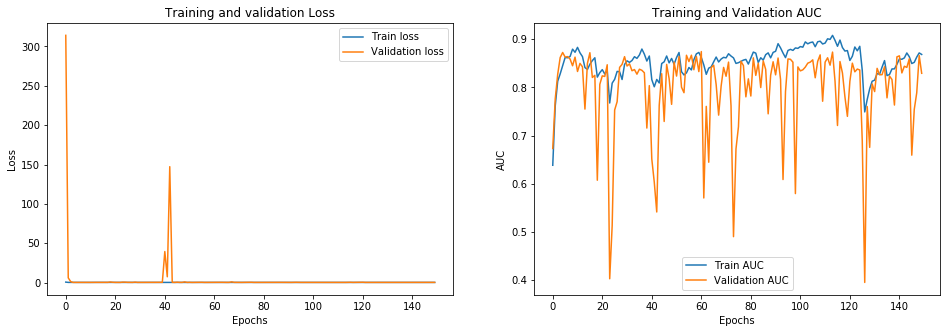

In [72]:
plot_loss_auc(History_model_6)

# Tuner

In [73]:
from tensorflow.keras.optimizers import Adam

In [74]:
def build_model_it3_tuner(hp):
    model = Sequential()
    # Basic convnet with Conv layer with input shape (150, 150, 3)
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    # Max pooling layer
    model.add(MaxPooling2D((2, 2)))
    # Conv2D layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    # Max pooling layer
    model.add(MaxPooling2D((2, 2)))
    # Conv2D layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    # Max pooling layer
    model.add(MaxPooling2D((2, 2)))
    # Conv2D layer
   #model.add(Conv2D(128, (3, 3), activation='relu'))
    # Max pooling layer
    #model.add(MaxPooling2D((2, 2)))

    #to flatten higher dimension output to 1D
    model.add(Flatten())
    
    model.add(Dropout(0.2))
    # Dense layer with 512 units
    model.add(
          Dense(
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            activation="relu",
        ))
    #model.add(Dense(512, activation='relu'))
    # Dense layer with 64 units
    #model.add(Dense(128, activation='relu'))
    # Last layer with softmax activation.
    model.add(Dense(1, activation='sigmoid'))
        
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
        ),
        loss="binary_crossentropy",
        metrics=[tensorflow.keras.metrics.AUC(name="auc")],
    )
    #model.compile(optimizer='adam',loss='binary_crossentropy',metrics=[tensorflow.keras.metrics.AUC(name="auc")])
    return model

In [75]:
import keras_tuner as kt
from tensorflow import keras
tuner_it3 = kt.RandomSearch(
    build_model_it3_tuner,
    kt.Objective("val_auc", direction="max"),
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)

In [76]:
tuner_it3.search_space_summary()

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [77]:
tuner_it3.search(partial_images_train, partial_labels_train, epochs=2, validation_data=(images_val, labels_val))

Trial 3 Complete [00h 00m 14s]
val_auc: 0.5290996134281158

Best val_auc So Far: 0.7755890786647797
Total elapsed time: 00h 00m 43s
INFO:tensorflow:Oracle triggered exit


In [78]:
tuner_it3.results_summary()

Results summary
Results in my_dir\helloworld
Showing 10 best trials
Trial summary
Hyperparameters:
units: 160
learning_rate: 0.0001
Score: 0.7755890786647797
Trial summary
Hyperparameters:
units: 64
learning_rate: 0.001
Score: 0.7705076634883881
Trial summary
Hyperparameters:
units: 224
learning_rate: 0.01
Score: 0.5290996134281158


In [134]:
def build_model_vgg_tuner(hp):
    model = Sequential()
    model.add(vgg_b)
    model.add(Flatten())
    #model.add(Dense(256, activation='relu'))
    #model.add(Dense(1, activation='sigmoid'))
    model.add(
          Dense(
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            activation="relu",
        ))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
        ),
        loss="binary_crossentropy",
        metrics=[tensorflow.keras.metrics.AUC(name="auc")],
    )
        
    #model.compile(optimizer='adam',loss='binary_crossentropy',metrics=[tensorflow.keras.metrics.AUC(name="auc")])
    return model

In [135]:
import keras_tuner as kt
from tensorflow import keras
tuner_Vgg = kt.RandomSearch(
    build_model_vgg_tuner,
    kt.Objective("val_auc", direction="max"),
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)

In [136]:
tuner_Vgg.search_space_summary()

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [138]:
tuner_Vgg.search(partial_images_train, partial_labels_train, epochs=2, validation_data=(images_val, labels_val))

Trial 3 Complete [00h 00m 31s]
val_auc: 0.8482040464878082

Best val_auc So Far: 0.8484770357608795
Total elapsed time: 00h 01m 33s
INFO:tensorflow:Oracle triggered exit


In [139]:
tuner_Vgg.results_summary()

Results summary
Results in my_dir\helloworld
Showing 10 best trials
Trial summary
Hyperparameters:
units: 192
learning_rate: 0.001
Score: 0.8484770357608795
Trial summary
Hyperparameters:
units: 352
learning_rate: 0.0001
Score: 0.8482040464878082
Trial summary
Hyperparameters:
units: 96
learning_rate: 0.001
Score: 0.8476867377758026


# Tuner 2 

In [79]:
def build_model_V3_tuner(hp):
    model = Sequential()
    model.add(InceptionV3_b)
    model.add(Flatten())
   #model.add(Dense(256, activation='relu'))
    #model.add(Dense(1, activation='sigmoid'))
    model.add(
          Dense(
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            activation="relu",
        ))
    #model.add(Dense(512, activation='relu'))
    # Dense layer with 64 units
    #model.add(Dense(128, activation='relu'))
    # Last layer with softmax activation.
    model.add(Dense(1, activation='sigmoid'))
        
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
        ),
        loss="binary_crossentropy",
        metrics=[tensorflow.keras.metrics.AUC(name="auc")],
    )
    #model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=[tensorflow.keras.metrics.AUC(name="auc")])
    return model

In [80]:
import keras_tuner as kt
from tensorflow import keras
tuner_V3 = kt.RandomSearch(
    build_model_V3_tuner,
    kt.Objective("val_auc", direction="max"),
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)

In [81]:
tuner_V3.search_space_summary()

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [82]:
tuner_V3.search(partial_images_train, partial_labels_train, epochs=2, validation_data=(images_val, labels_val))

Trial 3 Complete [00h 00m 34s]
val_auc: 0.8374808132648468

Best val_auc So Far: 0.8378447890281677
Total elapsed time: 00h 01m 39s
INFO:tensorflow:Oracle triggered exit


In [83]:
tuner_V3.results_summary()

Results summary
Results in my_dir\helloworld
Showing 10 best trials
Trial summary
Hyperparameters:
units: 128
learning_rate: 0.001
Score: 0.8378447890281677
Trial summary
Hyperparameters:
units: 32
learning_rate: 0.0001
Score: 0.8374808132648468
Trial summary
Hyperparameters:
units: 256
learning_rate: 0.001
Score: 0.8368246853351593


# TUNER 3

In [84]:
def build_model_RN_tuner(hp):
    model = Sequential()
    model.add(ResNet50_b)
    model.add(Flatten())
   #model.add(Dense(256, activation='relu'))
    #model.add(Dense(1, activation='sigmoid'))
    model.add(
          Dense(
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            activation="relu",
        ))
    #model.add(Dense(512, activation='relu'))
    # Dense layer with 64 units
    #model.add(Dense(128, activation='relu'))
    # Last layer with softmax activation.
    model.add(Dense(1, activation='sigmoid'))
        
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
        ),
        loss="binary_crossentropy",
        metrics=[tensorflow.keras.metrics.AUC(name="auc")],
    )
    #model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=[tensorflow.keras.metrics.AUC(name="auc")])
    return model

In [85]:
import keras_tuner as kt
from tensorflow import keras
tuner_RN = kt.RandomSearch(
    build_model_RN_tuner,
    kt.Objective("val_auc", direction="max"),
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)

In [86]:
tuner_RN.search_space_summary()

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [87]:
tuner_RN.search(partial_images_train, partial_labels_train, epochs=2, validation_data=(images_val, labels_val))

Trial 3 Complete [00h 00m 40s]
val_auc: 0.8559530377388

Best val_auc So Far: 0.8673659563064575
Total elapsed time: 00h 01m 53s
INFO:tensorflow:Oracle triggered exit


In [88]:
tuner_RN.results_summary()

Results summary
Results in my_dir\helloworld
Showing 10 best trials
Trial summary
Hyperparameters:
units: 32
learning_rate: 0.001
Score: 0.8673659563064575
Trial summary
Hyperparameters:
units: 96
learning_rate: 0.01
Score: 0.8559530377388
Trial summary
Hyperparameters:
units: 64
learning_rate: 0.01
Score: 0.8533812761306763


# RE TRAINING

In [101]:
def build_model_it3_hyper():
    model = Sequential()
    # Basic convnet with Conv layer with input shape (150, 150, 3)
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    # Max pooling layer
    model.add(MaxPooling2D((2, 2)))
    # Conv2D layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    # Max pooling layer
    model.add(MaxPooling2D((2, 2)))
    # Conv2D layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    # Max pooling layer
    model.add(MaxPooling2D((2, 2)))
    # Conv2D layer
    #model.add(Conv2D(128, (3, 3), activation='relu'))
    # Max pooling layer
    #model.add(MaxPooling2D((2, 2)))

    #to flatten higher dimension output to 1D
    model.add(Flatten())
    
    model.add(Dropout(0.2))
    # Dense layer with 512 units
    
    model.add(Dense(160, activation='relu'))
    # Dense layer with 64 units
    #model.add(Dense(128, activation='relu'))
    # Last layer with softmax activation.
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(lr=0.0001),loss='binary_crossentropy',metrics=[tensorflow.keras.metrics.AUC(name="auc")])
    return model

In [102]:
model_it3_hyper = build_model_it3_hyper()

In [103]:
model_it3_hyper.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)            

In [104]:
History_model_it3_hyper = model_it3_hyper.fit(train_datagen.flow(partial_images_train, partial_labels_train, batch_size = 64),
                              epochs = 150, validation_data = (images_val,labels_val))

Epoch 1/150
69/69 [==============================] - 15s 211ms/step - loss: 0.2999 - auc: 0.6386 - val_loss: 0.2978 - val_auc: 0.7555
Epoch 2/150
69/69 [==============================] - 15s 213ms/step - loss: 0.2859 - auc: 0.6859 - val_loss: 0.2913 - val_auc: 0.7722
Epoch 3/150
69/69 [==============================] - 17s 248ms/step - loss: 0.2803 - auc: 0.7135 - val_loss: 0.2853 - val_auc: 0.7756
Epoch 4/150
69/69 [==============================] - 15s 221ms/step - loss: 0.2798 - auc: 0.7132 - val_loss: 0.2845 - val_auc: 0.7788
Epoch 5/150
69/69 [==============================] - 15s 218ms/step - loss: 0.2755 - auc: 0.7377 - val_loss: 0.2837 - val_auc: 0.7702
Epoch 6/150
69/69 [==============================] - 16s 229ms/step - loss: 0.2746 - auc: 0.7367 - val_loss: 0.2779 - val_auc: 0.7802
Epoch 7/150
69/69 [==============================] - 16s 238ms/step - loss: 0.2689 - auc: 0.7593 - val_loss: 0.2794 - val_auc: 0.7749
Epoch 8/150
69/69 [==============================] - 16s 232ms

Epoch 62/150
69/69 [==============================] - 19s 274ms/step - loss: 0.2256 - auc: 0.8533 - val_loss: 0.2388 - val_auc: 0.8581
Epoch 63/150
69/69 [==============================] - 17s 245ms/step - loss: 0.2261 - auc: 0.8548 - val_loss: 0.2305 - val_auc: 0.8677
Epoch 64/150
69/69 [==============================] - 17s 241ms/step - loss: 0.2307 - auc: 0.8429 - val_loss: 0.2758 - val_auc: 0.8389
Epoch 65/150
69/69 [==============================] - 19s 275ms/step - loss: 0.2295 - auc: 0.8440 - val_loss: 0.2371 - val_auc: 0.8525
Epoch 66/150
69/69 [==============================] - 19s 274ms/step - loss: 0.2256 - auc: 0.8507 - val_loss: 0.2568 - val_auc: 0.8495
Epoch 67/150
69/69 [==============================] - 19s 272ms/step - loss: 0.2311 - auc: 0.8446 - val_loss: 0.2424 - val_auc: 0.8427
Epoch 68/150
69/69 [==============================] - 19s 269ms/step - loss: 0.2305 - auc: 0.8448 - val_loss: 0.2314 - val_auc: 0.8638
Epoch 69/150
69/69 [==============================] - 1

69/69 [==============================] - 18s 260ms/step - loss: 0.2189 - auc: 0.8665 - val_loss: 0.2421 - val_auc: 0.8591
Epoch 123/150
69/69 [==============================] - 17s 249ms/step - loss: 0.2128 - auc: 0.8740 - val_loss: 0.2367 - val_auc: 0.8616
Epoch 124/150
69/69 [==============================] - 16s 236ms/step - loss: 0.2128 - auc: 0.8722 - val_loss: 0.2342 - val_auc: 0.8781
Epoch 125/150
69/69 [==============================] - 17s 247ms/step - loss: 0.2101 - auc: 0.8784 - val_loss: 0.2379 - val_auc: 0.8623
Epoch 126/150
69/69 [==============================] - 17s 254ms/step - loss: 0.2095 - auc: 0.8794 - val_loss: 0.2258 - val_auc: 0.8799
Epoch 127/150
69/69 [==============================] - 17s 245ms/step - loss: 0.2085 - auc: 0.8833 - val_loss: 0.2326 - val_auc: 0.8774
Epoch 128/150
69/69 [==============================] - 18s 258ms/step - loss: 0.2132 - auc: 0.8745 - val_loss: 0.2458 - val_auc: 0.8576
Epoch 129/150
69/69 [==============================] - 16s 238

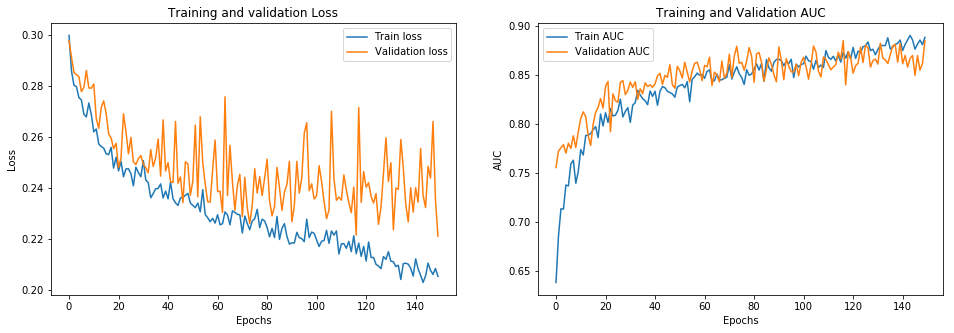

In [105]:
plot_loss_auc(History_model_it3_hyper)

In [141]:
def build_model_vgg_hyper():
    model = Sequential()
    model.add(vgg_b)
    model.add(Flatten())
    model.add(Dense(192, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=[tensorflow.keras.metrics.AUC(name="auc")])
    return model

In [143]:
model_Vgg_hyper = build_model_vgg_hyper()

In [144]:
len(model_Vgg_hyper.trainable_weights)

4

In [145]:
History_model_Vgg_hyper = model_Vgg_hyper.fit(train_datagen.flow(partial_images_train, partial_labels_train, batch_size = 64),
                              epochs = 150, validation_data = (images_val,labels_val))

Epoch 1/150
69/69 [==============================] - 16s 234ms/step - loss: 0.2458 - auc: 0.8318 - val_loss: 0.2506 - val_auc: 0.8486
Epoch 2/150
69/69 [==============================] - 16s 233ms/step - loss: 0.2153 - auc: 0.8743 - val_loss: 0.2438 - val_auc: 0.8500
Epoch 3/150
69/69 [==============================] - 16s 236ms/step - loss: 0.2124 - auc: 0.8818 - val_loss: 0.2465 - val_auc: 0.8498
Epoch 4/150
69/69 [==============================] - 16s 239ms/step - loss: 0.2178 - auc: 0.8731 - val_loss: 0.2457 - val_auc: 0.8482
Epoch 5/150
69/69 [==============================] - 17s 242ms/step - loss: 0.2130 - auc: 0.8806 - val_loss: 0.2463 - val_auc: 0.8486
Epoch 6/150
69/69 [==============================] - 17s 242ms/step - loss: 0.2137 - auc: 0.8776 - val_loss: 0.2582 - val_auc: 0.8474
Epoch 7/150
69/69 [==============================] - 17s 253ms/step - loss: 0.2128 - auc: 0.8805 - val_loss: 0.2479 - val_auc: 0.8495
Epoch 8/150
69/69 [==============================] - 17s 242ms

Epoch 62/150
69/69 [==============================] - 19s 270ms/step - loss: 0.2092 - auc: 0.8828 - val_loss: 0.2520 - val_auc: 0.8457
Epoch 63/150
69/69 [==============================] - 19s 270ms/step - loss: 0.2106 - auc: 0.8835 - val_loss: 0.2457 - val_auc: 0.8472
Epoch 64/150
69/69 [==============================] - 18s 263ms/step - loss: 0.2120 - auc: 0.8795 - val_loss: 0.2450 - val_auc: 0.8483
Epoch 65/150
69/69 [==============================] - 18s 263ms/step - loss: 0.2102 - auc: 0.8824 - val_loss: 0.2459 - val_auc: 0.8477
Epoch 66/150
69/69 [==============================] - 19s 270ms/step - loss: 0.2080 - auc: 0.8855 - val_loss: 0.2491 - val_auc: 0.8494
Epoch 67/150
69/69 [==============================] - 19s 272ms/step - loss: 0.2080 - auc: 0.8870 - val_loss: 0.2494 - val_auc: 0.8481
Epoch 68/150
69/69 [==============================] - 19s 269ms/step - loss: 0.2088 - auc: 0.8847 - val_loss: 0.2488 - val_auc: 0.8472
Epoch 69/150
69/69 [==============================] - 1

69/69 [==============================] - 18s 260ms/step - loss: 0.2105 - auc: 0.8816 - val_loss: 0.2469 - val_auc: 0.8506
Epoch 123/150
69/69 [==============================] - 18s 258ms/step - loss: 0.2081 - auc: 0.8855 - val_loss: 0.2541 - val_auc: 0.8488
Epoch 124/150
69/69 [==============================] - 18s 259ms/step - loss: 0.2098 - auc: 0.8842 - val_loss: 0.2492 - val_auc: 0.8514
Epoch 125/150
69/69 [==============================] - 18s 260ms/step - loss: 0.2103 - auc: 0.8815 - val_loss: 0.2474 - val_auc: 0.8509
Epoch 126/150
69/69 [==============================] - 18s 257ms/step - loss: 0.2133 - auc: 0.8776 - val_loss: 0.2469 - val_auc: 0.8499
Epoch 127/150
69/69 [==============================] - 19s 270ms/step - loss: 0.2123 - auc: 0.8790 - val_loss: 0.2525 - val_auc: 0.8476
Epoch 128/150
69/69 [==============================] - 18s 266ms/step - loss: 0.2076 - auc: 0.8852 - val_loss: 0.2457 - val_auc: 0.8503
Epoch 129/150
69/69 [==============================] - 18s 265

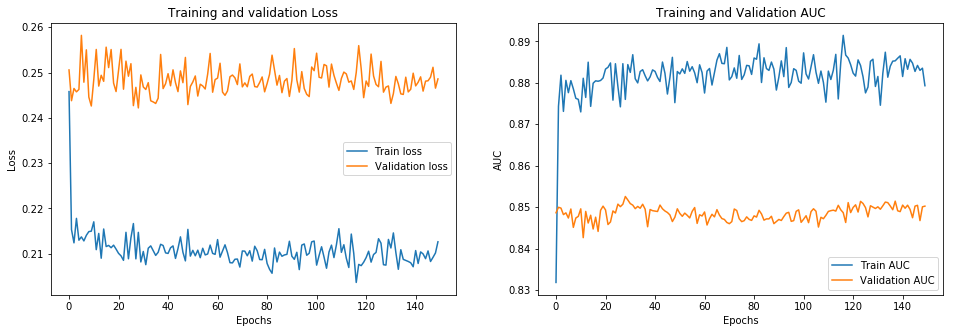

In [146]:
plot_loss_auc(History_model_Vgg_hyper)

In [106]:
def build_model_V3_hyper():
    model = Sequential()
    model.add(InceptionV3_b)
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=[tensorflow.keras.metrics.AUC(name="auc")])
    return model

In [107]:
model_V3_hyper = build_model_V3_hyper()

In [108]:
model_V3_hyper.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2, 2, 2048)        21802784  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 22,851,617
Trainable params: 1,048,833
Non-trainable params: 21,802,784
_________________________________________________________________


In [109]:
len(model_V3_hyper.trainable_weights)

4

In [110]:
History_model_V3_hyper = model_V3_hyper.fit(train_datagen.flow(partial_images_train, partial_labels_train, batch_size = 64),
                              epochs = 150, validation_data = (images_val,labels_val))

Epoch 1/150
69/69 [==============================] - 18s 262ms/step - loss: 0.6992 - auc: 0.8147 - val_loss: 0.2530 - val_auc: 0.8360
Epoch 2/150
69/69 [==============================] - 17s 240ms/step - loss: 0.5350 - auc: 0.8643 - val_loss: 0.2554 - val_auc: 0.8369
Epoch 3/150
69/69 [==============================] - 17s 244ms/step - loss: 0.7291 - auc: 0.8734 - val_loss: 0.2554 - val_auc: 0.8335
Epoch 4/150
69/69 [==============================] - 17s 244ms/step - loss: 0.2189 - auc: 0.8735 - val_loss: 0.2635 - val_auc: 0.8315
Epoch 5/150
69/69 [==============================] - 17s 245ms/step - loss: 0.2147 - auc: 0.8740 - val_loss: 0.2603 - val_auc: 0.8306
Epoch 6/150
69/69 [==============================] - 17s 243ms/step - loss: 0.2162 - auc: 0.8743 - val_loss: 0.2636 - val_auc: 0.8322
Epoch 7/150
69/69 [==============================] - 17s 245ms/step - loss: 0.2165 - auc: 0.8786 - val_loss: 0.2751 - val_auc: 0.8260
Epoch 8/150
69/69 [==============================] - 17s 244ms

Epoch 62/150
69/69 [==============================] - 18s 257ms/step - loss: 0.2123 - auc: 0.8779 - val_loss: 0.2609 - val_auc: 0.8307
Epoch 63/150
69/69 [==============================] - 18s 261ms/step - loss: 0.2116 - auc: 0.8782 - val_loss: 0.2575 - val_auc: 0.8376
Epoch 64/150
69/69 [==============================] - 18s 257ms/step - loss: 0.2108 - auc: 0.8807 - val_loss: 0.2570 - val_auc: 0.8369
Epoch 65/150
69/69 [==============================] - 18s 258ms/step - loss: 0.2127 - auc: 0.8769 - val_loss: 0.2585 - val_auc: 0.8370
Epoch 66/150
69/69 [==============================] - 18s 260ms/step - loss: 0.2111 - auc: 0.8794 - val_loss: 0.2558 - val_auc: 0.8380
Epoch 67/150
69/69 [==============================] - 18s 262ms/step - loss: 0.2108 - auc: 0.8816 - val_loss: 0.2594 - val_auc: 0.8342
Epoch 68/150
69/69 [==============================] - 19s 274ms/step - loss: 0.2182 - auc: 0.8798 - val_loss: 0.2600 - val_auc: 0.8338
Epoch 69/150
69/69 [==============================] - 1

69/69 [==============================] - 18s 266ms/step - loss: 0.2117 - auc: 0.8797 - val_loss: 0.2713 - val_auc: 0.8314
Epoch 123/150
69/69 [==============================] - 19s 272ms/step - loss: 0.2118 - auc: 0.8766 - val_loss: 0.2619 - val_auc: 0.8322
Epoch 124/150
69/69 [==============================] - 18s 264ms/step - loss: 0.2078 - auc: 0.8850 - val_loss: 0.2732 - val_auc: 0.8328
Epoch 125/150
69/69 [==============================] - 17s 251ms/step - loss: 0.2072 - auc: 0.8861 - val_loss: 0.2600 - val_auc: 0.8323
Epoch 126/150
69/69 [==============================] - 17s 250ms/step - loss: 0.2061 - auc: 0.8859 - val_loss: 0.2605 - val_auc: 0.8384
Epoch 127/150
69/69 [==============================] - 17s 246ms/step - loss: 0.2115 - auc: 0.8777 - val_loss: 0.2619 - val_auc: 0.8318
Epoch 128/150
69/69 [==============================] - 18s 254ms/step - loss: 0.2065 - auc: 0.8868 - val_loss: 0.2612 - val_auc: 0.8316
Epoch 129/150
69/69 [==============================] - 17s 240

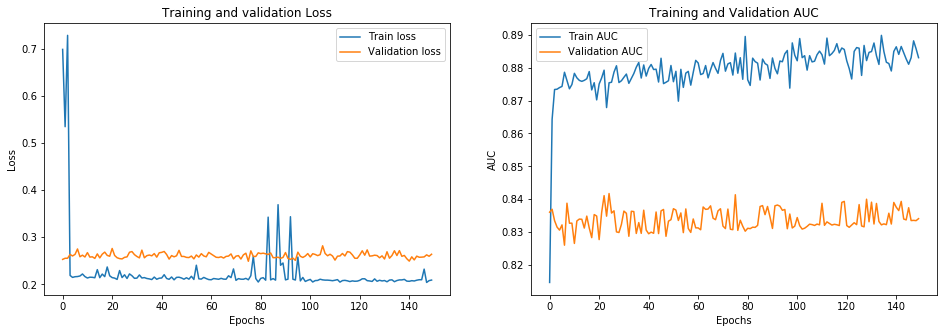

In [111]:
plot_loss_auc(History_model_V3_hyper)

In [113]:
def build_model_RN_hyper():
    model = Sequential()
    model.add(ResNet50_b)
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=[tensorflow.keras.metrics.AUC(name="auc")])
    return model

In [115]:
model_RN_hyper = build_model_RN_hyper()

In [116]:
model_RN_hyper.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
flatten_5 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1048608   
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 24,636,353
Trainable params: 1,048,641
Non-trainable params: 23,587,712
_________________________________________________________________


In [117]:
History_model_RN_hyper = model_RN_hyper.fit(train_datagen.flow(partial_images_train, partial_labels_train, batch_size = 64),
                              epochs = 150, validation_data = (images_val,labels_val))

Epoch 1/150
69/69 [==============================] - 16s 235ms/step - loss: 2.1777 - auc: 0.7832 - val_loss: 0.2388 - val_auc: 0.8619
Epoch 2/150
69/69 [==============================] - 17s 249ms/step - loss: 0.2148 - auc: 0.8757 - val_loss: 0.2387 - val_auc: 0.8679
Epoch 3/150
69/69 [==============================] - 17s 249ms/step - loss: 0.2118 - auc: 0.8814 - val_loss: 0.2388 - val_auc: 0.8631
Epoch 4/150
69/69 [==============================] - 17s 253ms/step - loss: 0.2084 - auc: 0.8841 - val_loss: 0.2402 - val_auc: 0.8637
Epoch 5/150
69/69 [==============================] - 18s 255ms/step - loss: 0.2098 - auc: 0.8835 - val_loss: 0.2382 - val_auc: 0.8641
Epoch 6/150
69/69 [==============================] - 18s 259ms/step - loss: 0.2112 - auc: 0.8837 - val_loss: 0.2411 - val_auc: 0.8611
Epoch 7/150
69/69 [==============================] - 18s 265ms/step - loss: 0.2095 - auc: 0.8848 - val_loss: 0.2434 - val_auc: 0.8607
Epoch 8/150
69/69 [==============================] - 18s 264ms

Epoch 62/150
69/69 [==============================] - 20s 293ms/step - loss: 0.2109 - auc: 0.8818 - val_loss: 0.2516 - val_auc: 0.8560
Epoch 63/150
69/69 [==============================] - 21s 307ms/step - loss: 0.2007 - auc: 0.8946 - val_loss: 0.2554 - val_auc: 0.8575
Epoch 64/150
69/69 [==============================] - 21s 306ms/step - loss: 0.2040 - auc: 0.8907 - val_loss: 0.2514 - val_auc: 0.8566
Epoch 65/150
69/69 [==============================] - 22s 314ms/step - loss: 0.2064 - auc: 0.8861 - val_loss: 0.2532 - val_auc: 0.8581
Epoch 66/150
69/69 [==============================] - 20s 284ms/step - loss: 0.2014 - auc: 0.8918 - val_loss: 0.2539 - val_auc: 0.8583
Epoch 67/150
69/69 [==============================] - 19s 279ms/step - loss: 0.2049 - auc: 0.8877 - val_loss: 0.2513 - val_auc: 0.8555
Epoch 68/150
69/69 [==============================] - 21s 302ms/step - loss: 0.2033 - auc: 0.8910 - val_loss: 0.2601 - val_auc: 0.8553
Epoch 69/150
69/69 [==============================] - 2

69/69 [==============================] - 18s 267ms/step - loss: 0.1961 - auc: 0.9007 - val_loss: 0.2604 - val_auc: 0.8566
Epoch 123/150
69/69 [==============================] - 18s 261ms/step - loss: 0.2032 - auc: 0.8895 - val_loss: 0.2546 - val_auc: 0.8552
Epoch 124/150
69/69 [==============================] - 19s 275ms/step - loss: 0.2009 - auc: 0.8925 - val_loss: 0.2532 - val_auc: 0.8592
Epoch 125/150
69/69 [==============================] - 18s 260ms/step - loss: 0.2000 - auc: 0.8954 - val_loss: 0.2580 - val_auc: 0.8598
Epoch 126/150
69/69 [==============================] - 18s 256ms/step - loss: 0.1995 - auc: 0.8946 - val_loss: 0.2529 - val_auc: 0.8549
Epoch 127/150
69/69 [==============================] - 18s 259ms/step - loss: 0.1999 - auc: 0.8938 - val_loss: 0.2552 - val_auc: 0.8574
Epoch 128/150
69/69 [==============================] - 18s 255ms/step - loss: 0.2008 - auc: 0.8903 - val_loss: 0.2565 - val_auc: 0.8570
Epoch 129/150
69/69 [==============================] - 18s 259

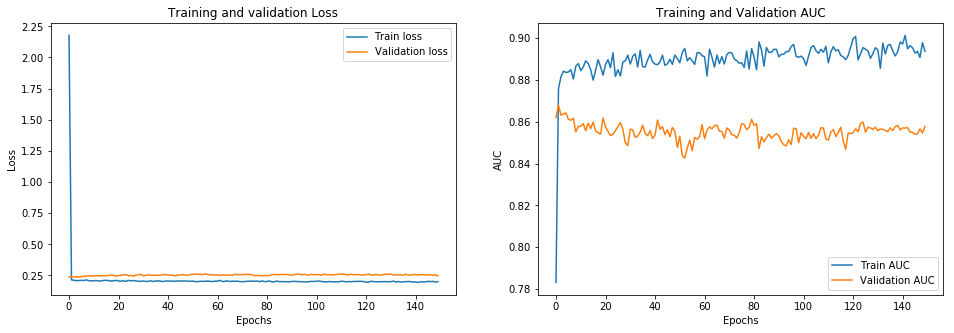

In [118]:
plot_loss_auc(History_model_RN_hyper)

In [119]:
model_it3_hyper_kfold = build_model_it3_hyper()

In [120]:
model_it3_hyper_kfold.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 25088)            

In [121]:
train_datagen.fit(train_images)

In [122]:
History_model_it3_hyper_kfold = k_fold_validation(5, model_it3_hyper_kfold, 150, 64)

processing fold # 0
Epoch 1/150
65/65 [==============================] - 17s 255ms/step - loss: 0.3167 - auc: 0.6042 - val_loss: 0.3031 - val_auc: 0.7497
Epoch 2/150
65/65 [==============================] - 16s 251ms/step - loss: 0.2824 - auc: 0.6986 - val_loss: 0.3018 - val_auc: 0.7626
Epoch 3/150
65/65 [==============================] - 16s 246ms/step - loss: 0.2804 - auc: 0.7020 - val_loss: 0.2988 - val_auc: 0.7548
Epoch 4/150
65/65 [==============================] - 16s 251ms/step - loss: 0.2784 - auc: 0.7109 - val_loss: 0.3018 - val_auc: 0.7646
Epoch 5/150
65/65 [==============================] - 16s 244ms/step - loss: 0.2744 - auc: 0.7307 - val_loss: 0.2911 - val_auc: 0.7729
Epoch 6/150
65/65 [==============================] - 15s 233ms/step - loss: 0.2719 - auc: 0.7342 - val_loss: 0.2965 - val_auc: 0.7589
Epoch 7/150
65/65 [==============================] - 15s 233ms/step - loss: 0.2672 - auc: 0.7571 - val_loss: 0.2957 - val_auc: 0.7653
Epoch 8/150
65/65 [=======================

65/65 [==============================] - 16s 239ms/step - loss: 0.2256 - auc: 0.8490 - val_loss: 0.2607 - val_auc: 0.8354
Epoch 62/150
65/65 [==============================] - 16s 241ms/step - loss: 0.2250 - auc: 0.8510 - val_loss: 0.2900 - val_auc: 0.8118
Epoch 63/150
65/65 [==============================] - 15s 229ms/step - loss: 0.2272 - auc: 0.8471 - val_loss: 0.2756 - val_auc: 0.8299
Epoch 64/150
65/65 [==============================] - 15s 229ms/step - loss: 0.2278 - auc: 0.8448 - val_loss: 0.2608 - val_auc: 0.8234
Epoch 65/150
65/65 [==============================] - 15s 229ms/step - loss: 0.2223 - auc: 0.8573 - val_loss: 0.2952 - val_auc: 0.8052
Epoch 66/150
65/65 [==============================] - 15s 227ms/step - loss: 0.2251 - auc: 0.8518 - val_loss: 0.2589 - val_auc: 0.8294
Epoch 67/150
65/65 [==============================] - 15s 226ms/step - loss: 0.2298 - auc: 0.8412 - val_loss: 0.2863 - val_auc: 0.8134
Epoch 68/150
65/65 [==============================] - 15s 227ms/step

65/65 [==============================] - 16s 241ms/step - loss: 0.2082 - auc: 0.8833 - val_loss: 0.2609 - val_auc: 0.8276
Epoch 122/150
65/65 [==============================] - 15s 234ms/step - loss: 0.2084 - auc: 0.8772 - val_loss: 0.2565 - val_auc: 0.8474
Epoch 123/150
65/65 [==============================] - 15s 235ms/step - loss: 0.2164 - auc: 0.8665 - val_loss: 0.2671 - val_auc: 0.8328
Epoch 124/150
65/65 [==============================] - 15s 237ms/step - loss: 0.2053 - auc: 0.8861 - val_loss: 0.2617 - val_auc: 0.8493
Epoch 125/150
65/65 [==============================] - 16s 240ms/step - loss: 0.2051 - auc: 0.8860 - val_loss: 0.2621 - val_auc: 0.8352
Epoch 126/150
65/65 [==============================] - 17s 266ms/step - loss: 0.2076 - auc: 0.8789 - val_loss: 0.2428 - val_auc: 0.8610
Epoch 127/150
65/65 [==============================] - 15s 236ms/step - loss: 0.2087 - auc: 0.8785 - val_loss: 0.2537 - val_auc: 0.8512
Epoch 128/150
65/65 [==============================] - 16s 240

65/65 [==============================] - 16s 239ms/step - loss: 0.2040 - auc: 0.8961 - val_loss: 0.1970 - val_auc: 0.8666
Epoch 32/150
65/65 [==============================] - 16s 248ms/step - loss: 0.2014 - auc: 0.8998 - val_loss: 0.2000 - val_auc: 0.8652
Epoch 33/150
65/65 [==============================] - 16s 249ms/step - loss: 0.2050 - auc: 0.8946 - val_loss: 0.1914 - val_auc: 0.8761
Epoch 34/150
65/65 [==============================] - 15s 234ms/step - loss: 0.1944 - auc: 0.9082 - val_loss: 0.2087 - val_auc: 0.8485
Epoch 35/150
65/65 [==============================] - 16s 248ms/step - loss: 0.2075 - auc: 0.8878 - val_loss: 0.2074 - val_auc: 0.8785
Epoch 36/150
65/65 [==============================] - 15s 228ms/step - loss: 0.2019 - auc: 0.8973 - val_loss: 0.2052 - val_auc: 0.8586
Epoch 37/150
65/65 [==============================] - 15s 226ms/step - loss: 0.2026 - auc: 0.8957 - val_loss: 0.2054 - val_auc: 0.8672
Epoch 38/150
65/65 [==============================] - 15s 226ms/step

Epoch 92/150
65/65 [==============================] - 15s 225ms/step - loss: 0.1810 - auc: 0.9199 - val_loss: 0.2195 - val_auc: 0.8302
Epoch 93/150
65/65 [==============================] - 15s 225ms/step - loss: 0.1771 - auc: 0.9267 - val_loss: 0.2194 - val_auc: 0.8426
Epoch 94/150
65/65 [==============================] - 16s 244ms/step - loss: 0.1852 - auc: 0.9189 - val_loss: 0.2245 - val_auc: 0.8515
Epoch 95/150
65/65 [==============================] - 15s 226ms/step - loss: 0.1846 - auc: 0.9160 - val_loss: 0.2281 - val_auc: 0.8322
Epoch 96/150
65/65 [==============================] - 15s 231ms/step - loss: 0.1846 - auc: 0.9173 - val_loss: 0.2182 - val_auc: 0.8513
Epoch 97/150
65/65 [==============================] - 15s 225ms/step - loss: 0.1808 - auc: 0.9210 - val_loss: 0.2244 - val_auc: 0.8395
Epoch 98/150
65/65 [==============================] - 15s 227ms/step - loss: 0.1836 - auc: 0.9193 - val_loss: 0.2288 - val_auc: 0.8401
Epoch 99/150
65/65 [==============================] - 1

65/65 [==============================] - 15s 236ms/step - loss: 0.1739 - auc: 0.9228 - val_loss: 0.1479 - val_auc: 0.9492
Epoch 3/150
65/65 [==============================] - 16s 239ms/step - loss: 0.1687 - auc: 0.9284 - val_loss: 0.1701 - val_auc: 0.9245
Epoch 4/150
65/65 [==============================] - 15s 234ms/step - loss: 0.1737 - auc: 0.9259 - val_loss: 0.1578 - val_auc: 0.9384
Epoch 5/150
65/65 [==============================] - 15s 228ms/step - loss: 0.1743 - auc: 0.9236 - val_loss: 0.1652 - val_auc: 0.9338
Epoch 6/150
65/65 [==============================] - 16s 241ms/step - loss: 0.1751 - auc: 0.9202 - val_loss: 0.1719 - val_auc: 0.9294
Epoch 7/150
65/65 [==============================] - 15s 238ms/step - loss: 0.1674 - auc: 0.9298 - val_loss: 0.1588 - val_auc: 0.9380
Epoch 8/150
65/65 [==============================] - 16s 244ms/step - loss: 0.1677 - auc: 0.9317 - val_loss: 0.1518 - val_auc: 0.9462
Epoch 9/150
65/65 [==============================] - 16s 239ms/step - loss

Epoch 63/150
65/65 [==============================] - 15s 235ms/step - loss: 0.1488 - auc: 0.9477 - val_loss: 0.2059 - val_auc: 0.8929
Epoch 64/150
65/65 [==============================] - 15s 232ms/step - loss: 0.1428 - auc: 0.9515 - val_loss: 0.2091 - val_auc: 0.8887
Epoch 65/150
65/65 [==============================] - 15s 234ms/step - loss: 0.1417 - auc: 0.9530 - val_loss: 0.2035 - val_auc: 0.8900
Epoch 66/150
65/65 [==============================] - 15s 234ms/step - loss: 0.1511 - auc: 0.9452 - val_loss: 0.2341 - val_auc: 0.8775
Epoch 67/150
65/65 [==============================] - 15s 234ms/step - loss: 0.1533 - auc: 0.9394 - val_loss: 0.2230 - val_auc: 0.8827
Epoch 68/150
65/65 [==============================] - 15s 232ms/step - loss: 0.1473 - auc: 0.9455 - val_loss: 0.2213 - val_auc: 0.8711
Epoch 69/150
65/65 [==============================] - 15s 231ms/step - loss: 0.1415 - auc: 0.9532 - val_loss: 0.2034 - val_auc: 0.8959
Epoch 70/150
65/65 [==============================] - 1

65/65 [==============================] - 15s 232ms/step - loss: 0.1366 - auc: 0.9566 - val_loss: 0.2595 - val_auc: 0.8460
Epoch 124/150
65/65 [==============================] - 15s 232ms/step - loss: 0.1309 - auc: 0.9614 - val_loss: 0.2350 - val_auc: 0.8719
Epoch 125/150
65/65 [==============================] - 15s 236ms/step - loss: 0.1249 - auc: 0.9651 - val_loss: 0.2559 - val_auc: 0.8396
Epoch 126/150
65/65 [==============================] - 15s 238ms/step - loss: 0.1279 - auc: 0.9611 - val_loss: 0.2286 - val_auc: 0.8759
Epoch 127/150
65/65 [==============================] - 15s 238ms/step - loss: 0.1384 - auc: 0.9554 - val_loss: 0.2291 - val_auc: 0.8765
Epoch 128/150
65/65 [==============================] - 15s 236ms/step - loss: 0.1318 - auc: 0.9597 - val_loss: 0.2426 - val_auc: 0.8657
Epoch 129/150
65/65 [==============================] - 15s 234ms/step - loss: 0.1282 - auc: 0.9615 - val_loss: 0.2351 - val_auc: 0.8714
Epoch 130/150
65/65 [==============================] - 15s 237

65/65 [==============================] - 17s 256ms/step - loss: 0.1291 - auc: 0.9588 - val_loss: 0.2212 - val_auc: 0.9142
Epoch 34/150
65/65 [==============================] - 15s 231ms/step - loss: 0.1373 - auc: 0.9506 - val_loss: 0.2294 - val_auc: 0.8973
Epoch 35/150
65/65 [==============================] - 15s 232ms/step - loss: 0.1247 - auc: 0.9594 - val_loss: 0.1903 - val_auc: 0.9161
Epoch 36/150
65/65 [==============================] - 15s 237ms/step - loss: 0.1351 - auc: 0.9541 - val_loss: 0.2115 - val_auc: 0.9034
Epoch 37/150
65/65 [==============================] - 17s 263ms/step - loss: 0.1364 - auc: 0.9521 - val_loss: 0.2114 - val_auc: 0.9164
Epoch 38/150
65/65 [==============================] - 16s 240ms/step - loss: 0.1305 - auc: 0.9584 - val_loss: 0.1733 - val_auc: 0.9317
Epoch 39/150
65/65 [==============================] - 16s 248ms/step - loss: 0.1291 - auc: 0.9584 - val_loss: 0.2191 - val_auc: 0.9066
Epoch 40/150
65/65 [==============================] - 15s 233ms/step

Epoch 94/150
65/65 [==============================] - 15s 226ms/step - loss: 0.1067 - auc: 0.9722 - val_loss: 0.2414 - val_auc: 0.8867
Epoch 95/150
65/65 [==============================] - 15s 230ms/step - loss: 0.1133 - auc: 0.9680 - val_loss: 0.2734 - val_auc: 0.8841
Epoch 96/150
65/65 [==============================] - 15s 230ms/step - loss: 0.1211 - auc: 0.9630 - val_loss: 0.2482 - val_auc: 0.8820
Epoch 97/150
65/65 [==============================] - 15s 231ms/step - loss: 0.1143 - auc: 0.9686 - val_loss: 0.2833 - val_auc: 0.8839
Epoch 98/150
65/65 [==============================] - 15s 227ms/step - loss: 0.1064 - auc: 0.9743 - val_loss: 0.2497 - val_auc: 0.8944
Epoch 99/150
65/65 [==============================] - 15s 226ms/step - loss: 0.1109 - auc: 0.9720 - val_loss: 0.2963 - val_auc: 0.8730
Epoch 100/150
65/65 [==============================] - 15s 225ms/step - loss: 0.1148 - auc: 0.9673 - val_loss: 0.1905 - val_auc: 0.9242
Epoch 101/150
65/65 [==============================] -

65/65 [==============================] - 15s 237ms/step - loss: 0.1235 - auc: 0.9644 - val_loss: 0.0786 - val_auc: 0.9857
Epoch 5/150
65/65 [==============================] - 15s 237ms/step - loss: 0.1247 - auc: 0.9640 - val_loss: 0.0856 - val_auc: 0.9814
Epoch 6/150
65/65 [==============================] - 15s 238ms/step - loss: 0.1192 - auc: 0.9688 - val_loss: 0.1395 - val_auc: 0.9173
Epoch 7/150
65/65 [==============================] - 16s 239ms/step - loss: 0.1186 - auc: 0.9682 - val_loss: 0.1040 - val_auc: 0.9733
Epoch 8/150
65/65 [==============================] - 16s 239ms/step - loss: 0.1183 - auc: 0.9695 - val_loss: 0.1099 - val_auc: 0.9667
Epoch 9/150
65/65 [==============================] - 16s 248ms/step - loss: 0.1233 - auc: 0.9665 - val_loss: 0.0991 - val_auc: 0.9746
Epoch 10/150
65/65 [==============================] - 16s 246ms/step - loss: 0.1276 - auc: 0.9624 - val_loss: 0.1102 - val_auc: 0.9670
Epoch 11/150
65/65 [==============================] - 16s 243ms/step - lo

Epoch 65/150
65/65 [==============================] - 16s 243ms/step - loss: 0.0982 - auc: 0.9793 - val_loss: 0.1621 - val_auc: 0.9088
Epoch 66/150
65/65 [==============================] - 15s 236ms/step - loss: 0.0907 - auc: 0.9825 - val_loss: 0.1247 - val_auc: 0.9528
Epoch 67/150
65/65 [==============================] - 16s 242ms/step - loss: 0.1013 - auc: 0.9770 - val_loss: 0.1371 - val_auc: 0.9435
Epoch 68/150
65/65 [==============================] - 15s 237ms/step - loss: 0.0980 - auc: 0.9801 - val_loss: 0.1247 - val_auc: 0.9546
Epoch 69/150
65/65 [==============================] - 16s 240ms/step - loss: 0.1043 - auc: 0.9766 - val_loss: 0.1449 - val_auc: 0.9254
Epoch 70/150
65/65 [==============================] - 16s 239ms/step - loss: 0.0982 - auc: 0.9785 - val_loss: 0.1388 - val_auc: 0.9401
Epoch 71/150
65/65 [==============================] - 16s 240ms/step - loss: 0.0940 - auc: 0.9794 - val_loss: 0.1476 - val_auc: 0.9301
Epoch 72/150
65/65 [==============================] - 1

65/65 [==============================] - 15s 229ms/step - loss: 0.0860 - auc: 0.9833 - val_loss: 0.2036 - val_auc: 0.8822
Epoch 126/150
65/65 [==============================] - 15s 224ms/step - loss: 0.0875 - auc: 0.9835 - val_loss: 0.1667 - val_auc: 0.9220
Epoch 127/150
65/65 [==============================] - 15s 229ms/step - loss: 0.0843 - auc: 0.9847 - val_loss: 0.1756 - val_auc: 0.9066
Epoch 128/150
65/65 [==============================] - 15s 225ms/step - loss: 0.0846 - auc: 0.9846 - val_loss: 0.2187 - val_auc: 0.8676
Epoch 129/150
65/65 [==============================] - 15s 229ms/step - loss: 0.0920 - auc: 0.9793 - val_loss: 0.2044 - val_auc: 0.8915
Epoch 130/150
65/65 [==============================] - 15s 230ms/step - loss: 0.0849 - auc: 0.9866 - val_loss: 0.1807 - val_auc: 0.9113
Epoch 131/150
65/65 [==============================] - 15s 226ms/step - loss: 0.0831 - auc: 0.9852 - val_loss: 0.1576 - val_auc: 0.9328
Epoch 132/150
65/65 [==============================] - 15s 226

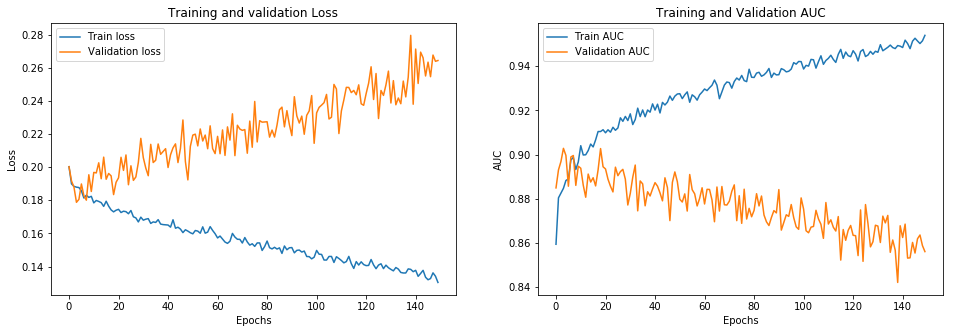

In [123]:
plot_loss_auc_kval(History_model_it3_hyper_kfold)

In [124]:
probs_model1 = model_it3_hyper.predict(test_images)

In [125]:
probs_model2 = model_V3_hyper.predict(test_images)

In [127]:
probs_model3 = model_RN_hyper.predict(test_images)

In [128]:
probs_model4 = model_it3_hyper_kfold.predict(test_images)

In [147]:
probs_model5 = model_Vgg_hyper.predict(test_images)

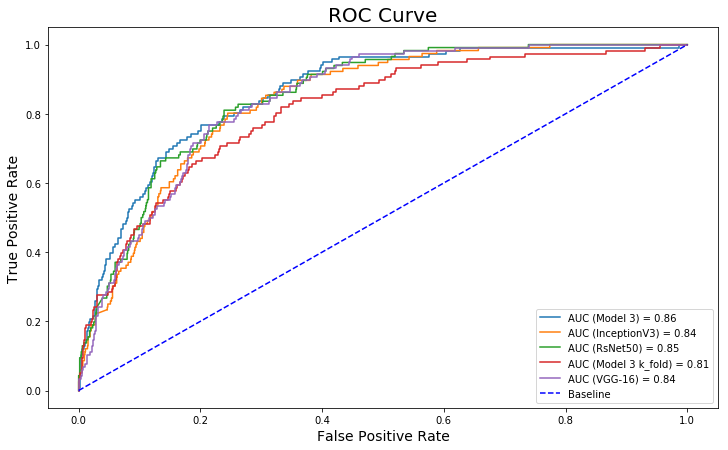

In [149]:
from sklearn.metrics import roc_auc_score, roc_curve


auc_model3 = roc_auc_score(test_labels, probs_model1)
fpr_model3, tpr_model3, thresholds_model3 = roc_curve(test_labels, probs_model1)

auc_V3 = roc_auc_score(test_labels, probs_model2)
fpr_V3, tpr_V3, thresholds_V3 = roc_curve(test_labels, probs_model2)

auc_RN = roc_auc_score(test_labels, probs_model3)
fpr_RN, tpr_RN, thresholds_RN = roc_curve(test_labels, probs_model3)

auc_model3_k = roc_auc_score(test_labels, probs_model4)
fpr_model3_k, tpr_model3_k, thresholds_model3_k = roc_curve(test_labels, probs_model4)

auc_vgg = roc_auc_score(test_labels, probs_model5)
fpr_vgg, tpr_vgg, thresholds_vgg = roc_curve(test_labels, probs_model5)

plt.figure(figsize=(12, 7))
plt.plot(fpr_model3, tpr_model3, label=f'AUC (Model 3) = {auc_model3:.2f}')
plt.plot(fpr_V3, tpr_V3, label=f'AUC (InceptionV3) = {auc_V3:.2f}')
plt.plot(fpr_RN, tpr_RN, label=f'AUC (RsNet50) = {auc_RN:.2f}')
plt.plot(fpr_model3_k, tpr_model3_k, label=f'AUC (Model 3 k_fold) = {auc_model3_k:.2f}')
plt.plot(fpr_vgg, tpr_vgg, label=f'AUC (VGG-16) = {auc_vgg:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();